In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
#Import the dataset with pandas 
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [9]:
#Create an X array
X = data.iloc[:, [6,8]].values

In [28]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 9 , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

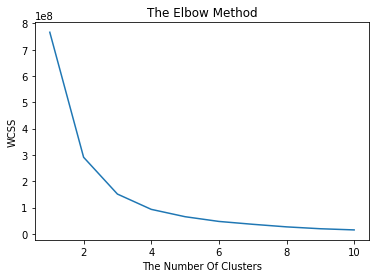

In [29]:
#Plot the elbow method 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('The Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow is is peacefully resting on 3, this means that the right number of clusters to use is 3.

In [30]:
#Applying k-means to the dataset with the right number of clusters
kmeans = KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 11, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0,
       0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0,

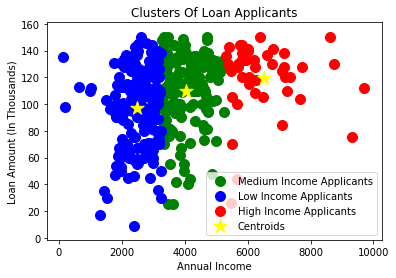

In [38]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Medium Income Applicants')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Income Applicants')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'High Income Applicants')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', marker ='*', label = 'Centroids')
plt.title('Clusters Of Loan Applicants')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.legend()
plt.show()